# Campus Placement Prediction

# Binary Classification Problem

# Target Variables 

# 1: Placed ,  2: Not Placed

# 1. Importing Essential Libraries

# 2. Import Dataset

# 3. Exploratory Data Analysis

### a. Check shape of Dataset

### b. precview the dataset

### c. summary of the dataset

### d. Description of Dataset

### e. check data types of column

### f. important points about dataset

### g. statistical properties of dataset

### h. view column Names

# 4. Univariate Analysis

### a. Analysis od target feature Variables

### b. Finding of univariate Variables

# 5. Bivariate Analysis

### a. Estimate correlation cofficients

### b. Analysis of target variable and cp variables

### c. Analysis of target variable and thalach variables

### d. Findings of bivariate Analysis

# 6. Multivariate Analysis

### Heatmap

# 7. Train Test Split

# 8.Fiting the classifer

# 9. Predication

# 10. Comparison of Different Classifers

# 11. Input to the model

# 12. Generate pickle File

# 13. web app using Streamlit

# 14. Deployement

# Importing Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings

C:\Users\usama\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Importing The Dataset

In [2]:
df = pd.read_csv("train.csv")

#### verifying it is a "dataframe" object in pandas

In [3]:
type(df)

pandas.core.frame.DataFrame

# Exploratory Data Analysis

In [4]:
#shape of the dataset
df.shape

(215, 15)

# Feature of the dataset i.e Columns of Dataset

In [5]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

# Preview the dataset to understand the data

#### printing out dfirst 5 rows of dataset

In [6]:
df.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,0,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,0,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,0,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,0,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,0,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


#### Gerenrate 5 sample rows or column

In [7]:
df.sample(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
156,157,0,84.2,Central,69.4,Central,Science,65.0,Sci&Tech,Yes,80.0,Mkt&HR,52.72,Placed,255000.0
116,117,0,68.2,Central,72.8,Central,Commerce,66.6,Comm&Mgmt,Yes,96.0,Mkt&Fin,70.85,Placed,300000.0
110,111,1,69.5,Central,70.0,Central,Science,72.0,Sci&Tech,No,57.2,Mkt&HR,54.80,Placed,250000.0
194,195,0,52.0,Others,55.0,Others,Commerce,56.3,Comm&Mgmt,No,59.0,Mkt&Fin,64.74,Not Placed,NaN
49,50,1,50.0,Others,37.0,Others,Arts,52.0,Others,No,65.0,Mkt&HR,56.11,Not Placed,NaN


##### Checking Null Values

### as salary and sl_no columns are not required for placement status prediction so we drop it

In [8]:
df.drop(['salary','sl_no','ssc_b','hsc_b'], axis=1, inplace=True)

In [9]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,0,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,0,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,0,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,0,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


In [10]:
df.isnull().sum()

gender            0
ssc_p             0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

# Univariate Analysis

#### our feature of interest is target  Variables

In [11]:
print("Total No Of Status")
print(len(df.status.unique()))

Total No Of Status
2


In [12]:
#looking at unique values
df["status"].unique()

array(['Placed', 'Not Placed'], dtype=object)

In [13]:
# frequency distribution of target variable
# number of instances (rows) that belong to each class
df.groupby("status").size()

status
Not Placed     67
Placed        148
dtype: int64

this is a classification problem


binary classification problem


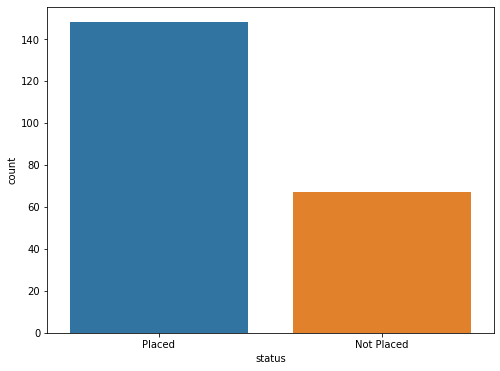

In [14]:
#visualizing the frequency distribution
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x="status", data=df)
plt.show()

# Frequency distribution of "target" variable w.r.t. fdifferent features

In [15]:
# Frequency distribution of "target" variable w.r.t. fdifferent features
# how many males and females are there in dataset
df.groupby('gender')['status'].value_counts()

gender  status    
0       Placed        100
        Not Placed     39
1       Placed         48
        Not Placed     28
Name: status, dtype: int64

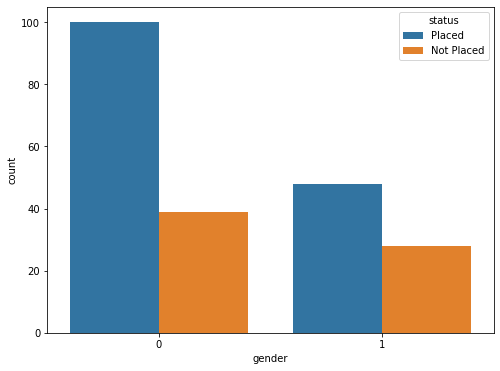

In [16]:
#visualizing the frequency distribution
f, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='gender', hue='status', data=df)
plt.show()

###  Finding of univariate Variables

# Discription

In [17]:
#getting information about the attributes and thier datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   hsc_p           215 non-null    float64
 3   hsc_s           215 non-null    object 
 4   degree_p        215 non-null    float64
 5   degree_t        215 non-null    object 
 6   workex          215 non-null    object 
 7   etest_p         215 non-null    float64
 8   specialisation  215 non-null    object 
 9   mba_p           215 non-null    float64
 10  status          215 non-null    object 
dtypes: float64(5), int64(1), object(5)
memory usage: 18.6+ KB


# Class Label or target variable

### analysing the target variable

In [18]:
df["status"].describe()

count        215
unique         2
top       Placed
freq         148
Name: status, dtype: object

# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
df["degree_t"] = df["degree_t"].astype('category')
df["workex"] = df["workex"].astype('category')
df["specialisation"] = df["specialisation"].astype('category')
df["status"] = df["status"].astype('category')
df["gender"] = df["gender"].astype('category')
df["hsc_s"] = df["hsc_s"].astype('category')
df.dtypes
df["workex"] = df["workex"].cat.codes
df["gender"] = df["gender"].cat.codes
df["degree_t"] = df["degree_t"].cat.codes
df["specialisation"] = df["specialisation"].cat.codes
df["status"] = df["status"].cat.codes
df["hsc_s"] = df["hsc_s"].cat.codes

In [21]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,0,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,0,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,0,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1


### Statistics of Dataset

In [22]:
df.describe()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.353488,67.303395,66.333163,1.372093,66.370186,0.600000,0.344186,72.100558,0.441860,62.278186,0.688372
std,0.479168,10.827205,10.897509,0.580978,7.358743,0.890238,0.476211,13.275956,0.497767,5.833385,0.464240
min,0.000000,40.890000,37.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000
25%,0.000000,60.600000,60.900000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000
50%,0.000000,67.000000,65.000000,1.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,1.000000
75%,1.000000,75.700000,73.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000
max,1.000000,89.400000,97.700000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000


In [23]:
#getting information about the attributes and thier datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int8   
 1   ssc_p           215 non-null    float64
 2   hsc_p           215 non-null    float64
 3   hsc_s           215 non-null    int8   
 4   degree_p        215 non-null    float64
 5   degree_t        215 non-null    int8   
 6   workex          215 non-null    int8   
 7   etest_p         215 non-null    float64
 8   specialisation  215 non-null    int8   
 9   mba_p           215 non-null    float64
 10  status          215 non-null    int8   
dtypes: float64(5), int8(6)
memory usage: 9.8 KB


### analysing the target variable

In [24]:
df["status"].describe()

count    215.000000
mean       0.688372
std        0.464240
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: status, dtype: float64

# Checking for Outliers

### An outlier is a data point that is noticeably different from the rest. They represent errors in measurement, bad data collection, or simply show variables not considered when collecting the data.

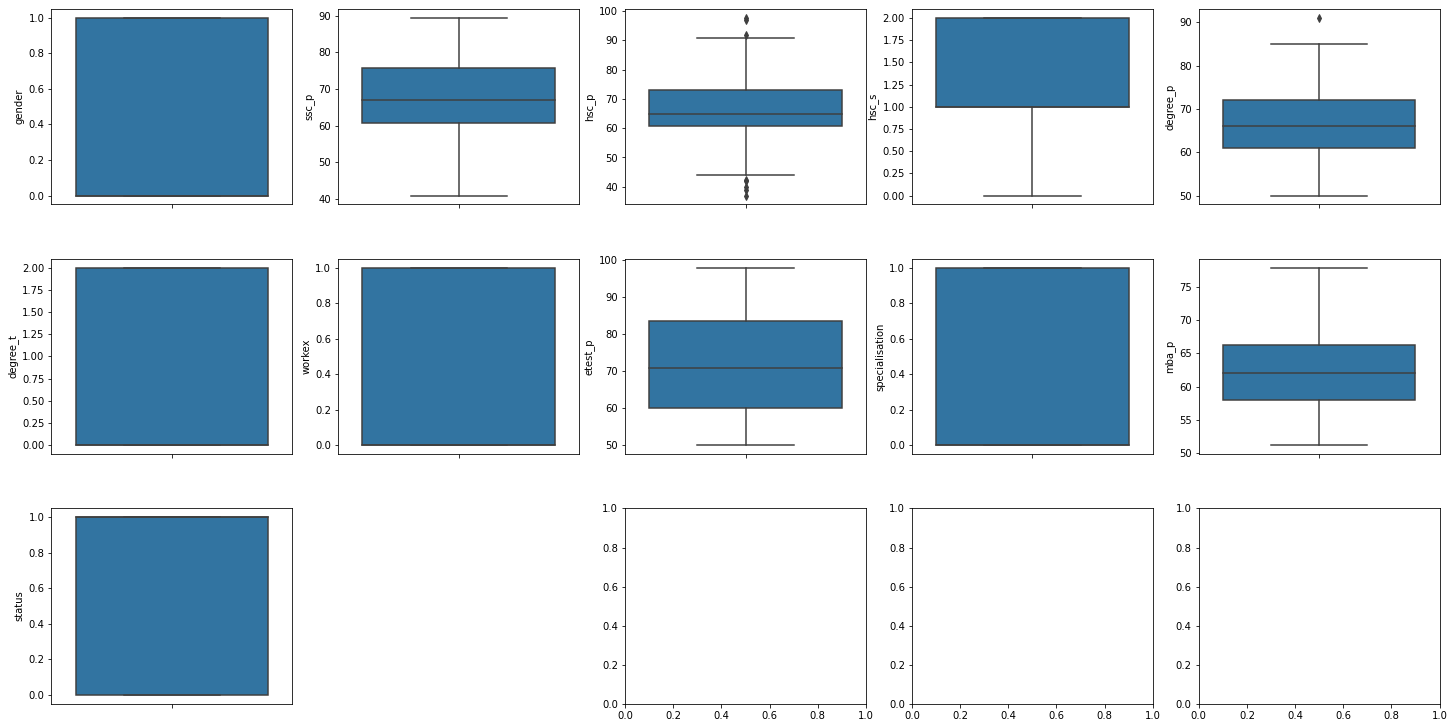

In [25]:
fig, axs = plt.subplots(ncols=5,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1

fig.delaxes(axs[index])
plt.tight_layout(pad=0.3, w_pad=0.5,h_pad = 4.5) 

In [26]:
# deleting some outliers in 2 columns degree_p and hsc_p
df = df[~(df['degree_p']>=90)]
df = df[~(df['hsc_p']>=95)]

# Bivariate Analysis

### Estimate correlation cofficients

### checking coorelation btw columns

##### Correlation plays a vital role in locating the important variables on which other variables depend.

In [27]:
df.corr()


,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
gender,1.000000,0.059818,0.022187,-0.072116,0.154679,-0.063117,-0.093325,-0.081765,0.103355,0.298466,-0.098189
ssc_p,0.059818,1.000000,0.528111,0.229080,0.528753,0.193851,0.183073,0.264009,-0.177436,0.377438,0.605381
hsc_p,0.022187,0.528111,1.000000,-0.172575,0.443595,-0.095199,0.135144,0.208809,-0.222405,0.335610,0.499777
hsc_s,-0.072116,0.229080,-0.172575,1.000000,0.122510,0.589604,0.019540,0.076214,0.170520,0.027663,0.028882
degree_p,0.154679,0.528753,0.443595,0.122510,1.000000,0.049952,0.135100,0.226353,-0.232618,0.376261,0.479557
degree_t,-0.063117,0.193851,-0.095199,0.589604,0.049952,1.000000,0.123191,0.008704,0.081459,0.099991,-0.028670
workex,-0.093325,0.183073,0.135144,0.019540,0.135100,0.123191,1.000000,0.052862,-0.187200,0.174951,0.279091
etest_p,-0.081765,0.264009,0.208809,0.076214,0.226353,0.008704,0.052862,1.000000,-0.222765,0.203663,0.122770
specialisation,0.103355,-0.177436,-0.222405,0.170520,-0.232618,0.081459,-0.187200,-0.222765,1.000000,-0.100456,-0.251043
mba_p,0.298466,0.377438,0.335610,0.027663,0.376261,0.099991,0.174951,0.203663,-0.100456,1.000000,0.063197


# Multivariate  Analysis

### multivariate analysis are perform to discover opatterns and relationships in dataset

### interpretation of heatmap

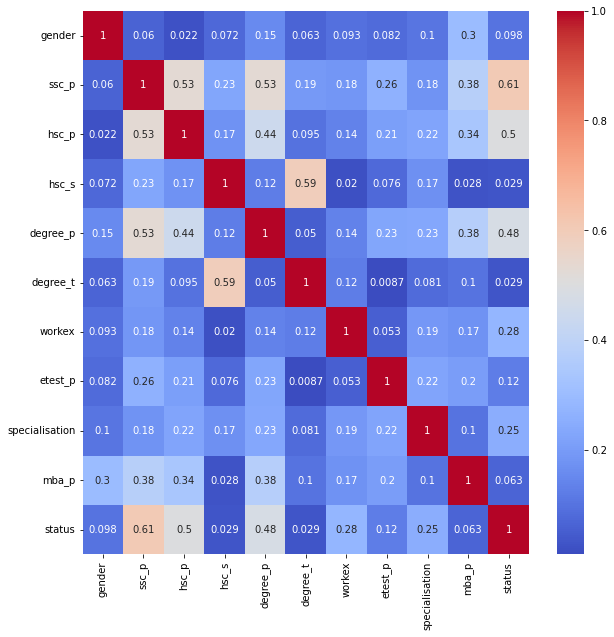

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap to show correlation between features
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr().abs(), annot=True, cmap='coolwarm')

plt.show()
   

# Analyzing the distributions of all features

##### analyze the distributions of all features

C:\Users\usama\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\usama\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\usama\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

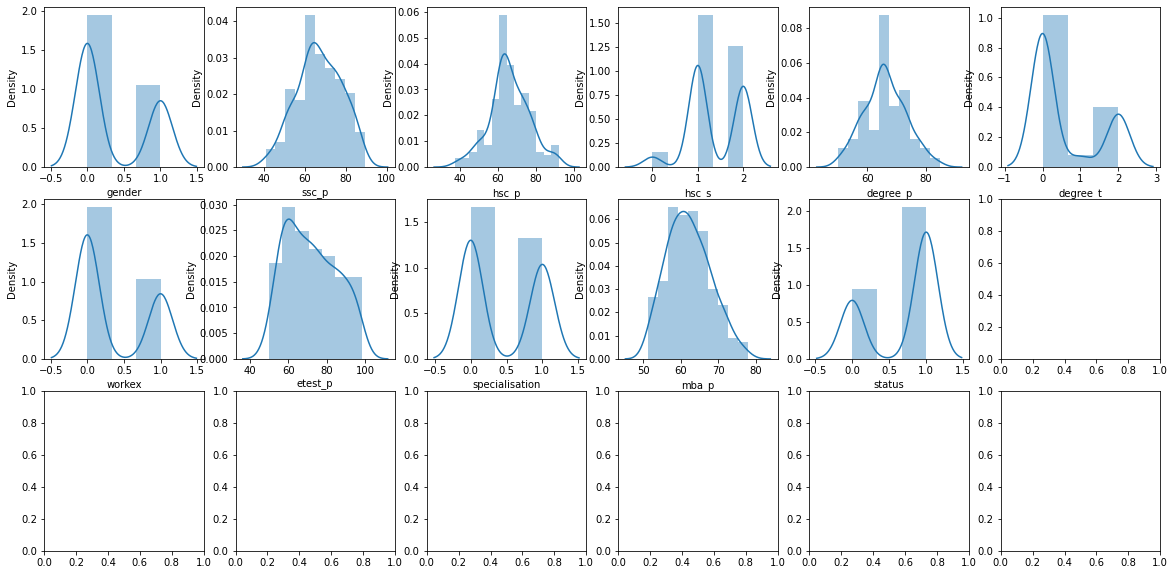

In [29]:
fig, axs = plt.subplots(ncols=6,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index+=1

In [30]:
df.columns

Index(['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [31]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,0,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,0,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,0,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1


# Train / Test split

In [32]:
from sklearn.model_selection import train_test_split
features = df.drop("status",axis=1)
target = df["status"]
X_train,X_test,Y_train,Y_test = train_test_split(features , target , test_size=0.2,random_state=0)

In [33]:
X_train.shape

(169, 10)

In [34]:
X_test.shape

(43, 10)

In [35]:
Y_train.shape

(169,)

In [36]:
Y_test.shape

(43,)

In [37]:
y = df.status
X = df.drop('status' , axis=1)
print(y.shape)
print(X.shape)

(212,)
(212, 10)


# Summary of train test set

In [38]:
print("Shape Of X_train"+str(X_train.shape))
print("Shape Of Y_train"+str(Y_train.shape))
print("Shape Of X_test"+str(X_test.shape))
print("Shape Of Y_test"+str(Y_test.shape))


Shape Of X_train(169, 10)
Shape Of Y_train(169,)
Shape Of X_test(43, 10)
Shape Of Y_test(43,)


###### We did this because their is difference in range of of features so it will become difficult for our machin learning model to predict to we will perform "Data Standardization"

# Data Standardization

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
scaler.fit(X)

StandardScaler()

In [41]:
standardized_data = scaler.transform(X)
standardized_data

array([[-0.73227856, -0.01432413,  2.37479035, ..., -1.29048509,
         1.12041026, -0.58203494],
       [-0.73227856,  1.12826645,  1.16624596, ...,  1.10609419,
        -0.89253021,  0.71850577],
       [-0.73227856, -0.19965918,  0.18090551, ...,  0.23115255,
        -0.89253021, -0.75590402],
       ...,
       [-0.73227856, -0.01432413,  0.08551921, ..., -0.98615757,
        -0.89253021,  1.3166154 ],
       [ 1.36560055,  0.63434855, -0.00986708, ..., -0.14925686,
         1.12041026, -0.33340216],
       [-0.73227856, -0.47766175, -0.77295746, ...,  1.2962989 ,
         1.12041026, -0.33514085]])

## So Now

In [42]:
X = standardized_data
print(X)
Y = df["status"]
print(Y)

[[-0.73227856 -0.01432413  2.37479035 ... -1.29048509  1.12041026
  -0.58203494]
 [-0.73227856  1.12826645  1.16624596 ...  1.10609419 -0.89253021
   0.71850577]
 [-0.73227856 -0.19965918  0.18090551 ...  0.23115255 -0.89253021
  -0.75590402]
 ...
 [-0.73227856 -0.01432413  0.08551921 ... -0.98615757 -0.89253021
   1.3166154 ]
 [ 1.36560055  0.63434855 -0.00986708 ... -0.14925686  1.12041026
  -0.33340216]
 [-0.73227856 -0.47766175 -0.77295746 ...  1.2962989   1.12041026
  -0.33514085]]
0      1
1      1
2      1
3      0
4      1
      ..
210    1
211    1
212    1
213    1
214    0
Name: status, Length: 212, dtype: int8


# Model Fitting

## Logistic Regression

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve,auc
from sklearn.metrics import accuracy_score, recall_score , f1_score,precision_score
from sklearn.model_selection import train_test_split 

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\usama\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
Y_pred_lr.shape

(43,)

# To Check the accuracy

In [46]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

In [47]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy Score achieved using Logistic Regression is "+ str(score_lr)+"%")

The accuracy Score achieved using Logistic Regression is 90.7%


# Confusion matrix and classification report

In [48]:
print(metrics.confusion_matrix(Y_pred_lr,Y_test))
print(classification_report(Y_pred_lr,Y_test))

[[16  3]
 [ 1 23]]
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        19
           1       0.88      0.96      0.92        24

    accuracy                           0.91        43
   macro avg       0.91      0.90      0.90        43
weighted avg       0.91      0.91      0.91        43



# Naive Bayes

In [49]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [50]:
Y_pred_nb.shape

(43,)

# Checking Accuracy Score

In [51]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The accuracy Score achieved using Naive Bayes is "+ str(score_nb)+"%")

The accuracy Score achieved using Naive Bayes is 83.72%


# Confusion matrix and classification report

In [52]:
print(metrics.confusion_matrix(Y_pred_nb,Y_test))
print(classification_report(Y_pred_nb,Y_test))

[[13  3]
 [ 4 23]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.88      0.85      0.87        27

    accuracy                           0.84        43
   macro avg       0.82      0.83      0.83        43
weighted avg       0.84      0.84      0.84        43



# Support Vector Machine

In [53]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train,Y_train)

Y_pred_svm = sv.predict(X_test)

In [54]:
Y_pred_svm.shape

(43,)

# Checking Accuracy Score

In [55]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The accuracy Score achieved using SVM is "+ str(score_svm)+"%")

The accuracy Score achieved using SVM is 88.37%


# Confusion matrix and classification report

In [56]:
print(metrics.confusion_matrix(Y_pred_nb,Y_test))
print(classification_report(Y_pred_nb,Y_test))

[[13  3]
 [ 4 23]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.88      0.85      0.87        27

    accuracy                           0.84        43
   macro avg       0.82      0.83      0.83        43
weighted avg       0.84      0.84      0.84        43



# K Nearest Neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,Y_train)

Y_pred_knn = knn.predict(X_test)

In [58]:
Y_pred_knn.shape

(43,)

# Checking Accuracy Score

In [59]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The accuracy Score achieved using K Nearest Neighbors is "+ str(score_knn)+"%")

The accuracy Score achieved using K Nearest Neighbors is 83.72%


# Confusion matrix and classification report

In [60]:
print(metrics.confusion_matrix(Y_pred_knn,Y_test))
print(classification_report(Y_pred_knn,Y_test))

[[11  1]
 [ 6 25]]
              precision    recall  f1-score   support

           0       0.65      0.92      0.76        12
           1       0.96      0.81      0.88        31

    accuracy                           0.84        43
   macro avg       0.80      0.86      0.82        43
weighted avg       0.87      0.84      0.84        43



# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range (200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
        
dt = DecisionTreeClassifier(random_state=best_x)

dt.fit(X_train,Y_train)

Y_pred_dt = dt.predict(X_test)

In [62]:
Y_pred_dt.shape

(43,)

# Checking Accuracy Score

In [63]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The accuracy Score achieved using Decision Tree is "+ str(score_dt)+"%")

The accuracy Score achieved using Decision Tree is 90.7%


# Confusion matrix and classification report

In [64]:
print(metrics.confusion_matrix(Y_pred_dt,Y_test))
print(classification_report(Y_pred_dt,Y_test))

[[15  2]
 [ 2 24]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.92      0.92      0.92        26

    accuracy                           0.91        43
   macro avg       0.90      0.90      0.90        43
weighted avg       0.91      0.91      0.91        43



# Random Forest 

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train,Y_train)

Y_pred_rf = rf.predict(X_test)

In [66]:
Y_pred_rf.shape

(43,)

# Checking Accuracy Score

In [67]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The accuracy Score achieved using Random Forest is "+ str(score_rf)+"%")

The accuracy Score achieved using Random Forest is 86.05%


# Confusion matrix and classification report

In [68]:
print(metrics.confusion_matrix(Y_pred_rf,Y_test))
print(classification_report(Y_pred_rf,Y_test))

[[13  2]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.92      0.86      0.89        28

    accuracy                           0.86        43
   macro avg       0.84      0.86      0.85        43
weighted avg       0.87      0.86      0.86        43



# Final Score 

In [69]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]

algorithms = ["Logistic Regression","Navie Bayes","Support Vector Machine","K Nearest Neighbors","Decision Tree","Random Forest Tress"]

for i in range(len(algorithms)):
    print("The Accuracy Score Achieved Using "+algorithms[i]+" is: "+ str(scores[i])+" %")

The Accuracy Score Achieved Using Logistic Regression is: 90.7 %
The Accuracy Score Achieved Using Navie Bayes is: 83.72 %
The Accuracy Score Achieved Using Support Vector Machine is: 88.37 %
The Accuracy Score Achieved Using K Nearest Neighbors is: 83.72 %
The Accuracy Score Achieved Using Decision Tree is: 90.7 %
The Accuracy Score Achieved Using Random Forest Tress is: 86.05 %


C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy Score'>

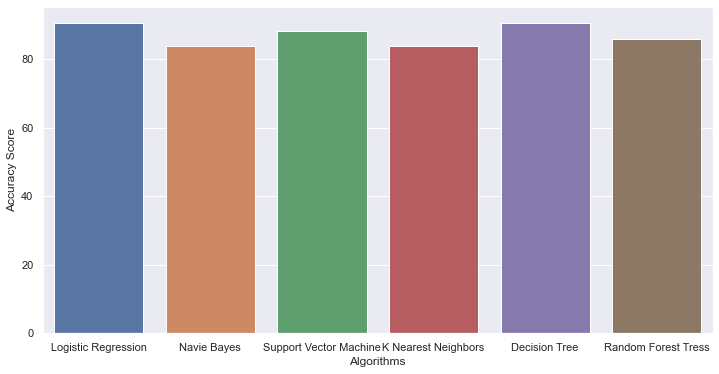

In [70]:
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

sns.barplot(algorithms,scores)

# So From Above Comparision , it can be visualized that Logistic Regression and Decision Tree Gives the best Accuracy

### accuracy on training data using Logistic Regression

In [71]:
X_train_prediction_lr = lr.predict(X_train)
training_data_accuracy_lr = round(accuracy_score(X_train_prediction_lr,Y_train)*100,2)
print("The Accuracy on training Data is using Logistic Regression: "+str(training_data_accuracy_lr)+" %")

The Accuracy on training Data is using Logistic Regression: 88.17 %


### accuracy on test data using Logistic Regression

In [72]:
X_test_prediction_lr = lr.predict(X_test)
test_data_accuracy_lr = round(accuracy_score(X_test_prediction_lr,Y_test)*100,2)
print("The Accuracy on test Data is using Logistic Regression: "+str(test_data_accuracy_lr)+" %")

The Accuracy on test Data is using Logistic Regression: 90.7 %


### accuracy on training data using Decision Tree

In [73]:
X_train_prediction_dt = dt.predict(X_train)
training_data_accuracy_dt = round(accuracy_score(X_train_prediction_dt,Y_train)*100,2)
print("The Accuracy on training Data is using Decision Tree: "+str(training_data_accuracy_dt)+" %")

The Accuracy on training Data is using Decision Tree: 100.0 %


### accuracy on test data using Decision Tree

In [74]:
X_test_prediction_dt = dt.predict(X_test)
test_data_accuracy_dt = round(accuracy_score(X_test_prediction_dt,Y_test)*100,2)
print("The Accuracy on test Data is using Decision Tree: "+str(test_data_accuracy_dt)+" %")

The Accuracy on test Data is using Decision Tree: 90.7 %


# Final Selection Of Model

In [75]:
train_test_accuracy_scores = [training_data_accuracy_lr,test_data_accuracy_lr,training_data_accuracy_dt,test_data_accuracy_dt]

Model = ["Training Data LR Accuracy","Testing Data LR Accuracy","Training Data DT Accuracy","Testing Data DT Accuracy"]

for i in range(len(Model)):
    print("The Accuracy Score Achieved Using "+Model[i]+" is: "+ str(train_test_accuracy_scores[i])+" %")

The Accuracy Score Achieved Using Training Data LR Accuracy is: 88.17 %
The Accuracy Score Achieved Using Testing Data LR Accuracy is: 90.7 %
The Accuracy Score Achieved Using Training Data DT Accuracy is: 100.0 %
The Accuracy Score Achieved Using Testing Data DT Accuracy is: 90.7 %


C:\Users\usama\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='Accuracy Score'>

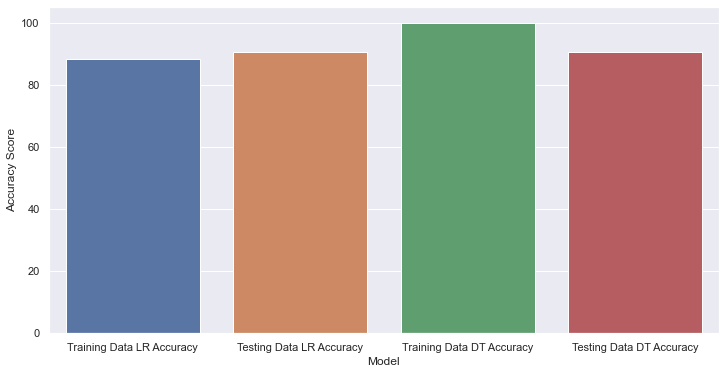

In [76]:
sns.set(rc={'figure.figsize':(12,6)})
plt.xlabel("Model")
plt.ylabel("Accuracy Score")

sns.barplot(Model,train_test_accuracy_scores)

# I'm Gonna use SVM Because Both Decision Tree & Logistic Regression Causing Overfitting

In [77]:
df.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,0,67.00,91.00,1,58.00,2,0,55.0,1,58.80,1
1,0,79.33,78.33,2,77.48,2,1,86.5,0,66.28,1
2,0,65.00,68.00,0,64.00,0,0,75.0,0,57.80,1
3,0,56.00,52.00,2,52.00,2,0,66.0,1,59.43,0
4,0,85.80,73.60,1,73.30,0,0,96.8,0,55.50,1


# Building A Predictive System

In [78]:
prediction = sv.predict([[0	,16.00,		12.00,		2,	12.00,	2,	0,	26.0,	1,	59.43]])
print(prediction)
if prediction[0] == 0:
    print("The Candidate isn't placed")
else:
    print("The Candidate is placed")

[0]
The Candidate isn't placed


C:\Users\usama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [79]:
prediction = sv.predict([[0	,67.00,		91.00,		1,	58.00,	2,	0,	55.0,	1,	58.80]])
print(prediction)
if prediction[0] == 0:
    print("The Candidate isn't placed")
else:
    print("The Candidate is placed")

[1]
The Candidate is placed


C:\Users\usama\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# Saving The Trained Model

In [80]:
import pickle

In [81]:
filename = 'placed_model.pkl'
pickle.dump(sv , open(filename, 'wb'))

### Loading The save model

In [82]:
load_model = pickle.load(open('placed_model.pkl','rb'))